In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col = 0)
# setting index col to 0 used the first column as the index instead of the default index

data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Types of supervised learning
-Classification: Predict a categorical response
  
  -Regression: Predict a continuous response

In [4]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


# primary object types
- DataFrame: rows and columns
    - SERIES: a single column

In [5]:
data.shape

(200, 4)

# What are the features?
- TV, RADIO, Newspaper. AD's


each column represents the amount of money spent on advertisig in the various mediums

# What is the response?

- sales: represents the ITEMS sold not cash amount

# WHAT ELSE DO WE KNOW?
- Because the response variable is continuous, this is a regression problem
    - there are 200 observations(represented by the rows)

In [6]:
import seaborn as sns

%matplotlib inline

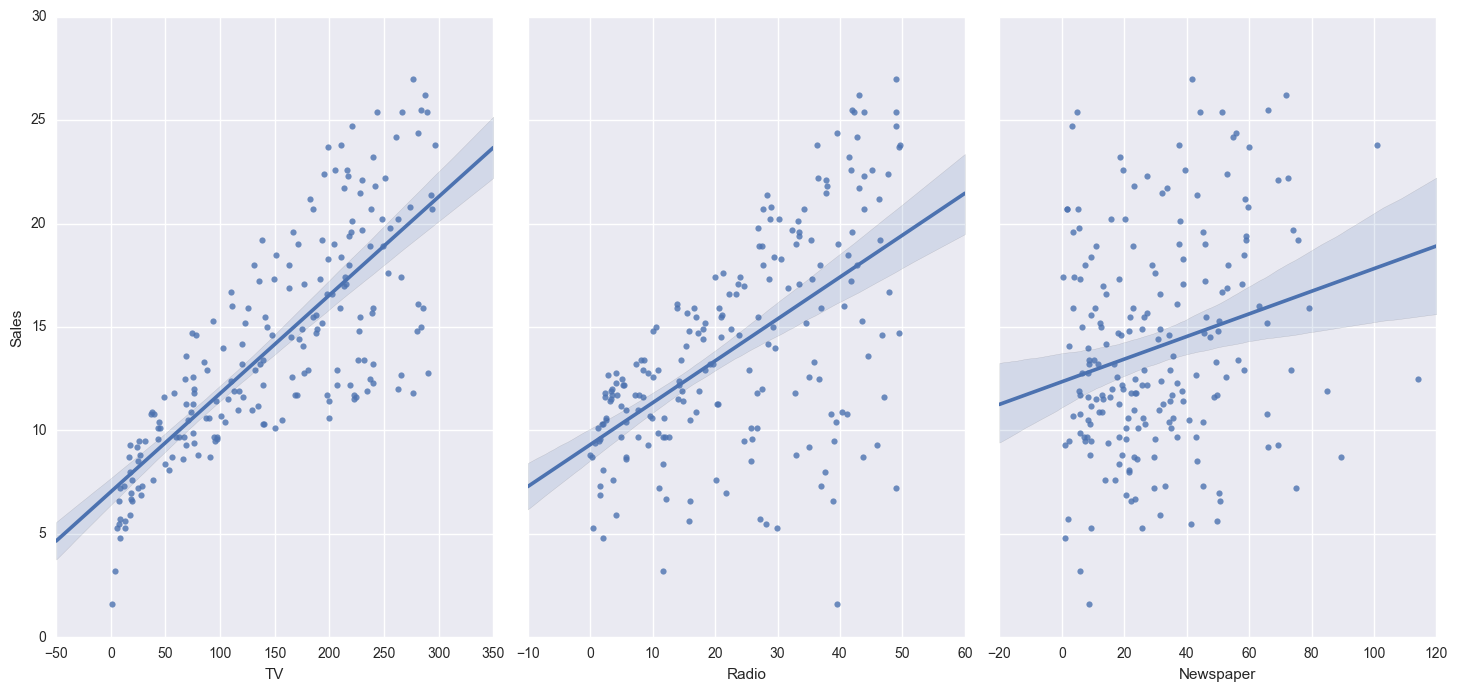

In [7]:
sns.pairplot(data, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size = 7, aspect = 0.7, kind ='reg')

# LINEAR REGRESSION
- PROS: fast, no tuning required, highly interpretable, well understood
- Cons: unlikely to produce the best predictive accuracy
    (presumes a linear relationship between the features and response)    

# FORM OF LINEAR REGRESSION 

Form of linear regression


$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
$y$ is the response

$\beta_0$ is the intercept

$\beta_1$ is the coefficient for $x_1$ (the first feature)

$\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:
$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$
The $\beta$ values are called the model coefficients. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

(least squares = line that fits the best data)

# Preparing X and y using pandas

scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.

However, pandas is built on top of NumPy.

Thus, X can be a pandas DataFrame and y can be a pandas Series!




REGRESSION - a type of supervised learnin problem in which the respnse is continuous

# VS.

#LINEAR REGRESSION - a machine learning method that can be used on regression problems


In [8]:
we create a new data frame with the columns we want
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']] #the outer bracket tells pandas you want a subset of data frame columns
#the inner bracket defines a python list

# print the first 5 rows
X.head()
#were building a new data frame based on the columns we want   

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [11]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [14]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [15]:
print(type(y))
print y.shape

<class 'pandas.core.series.Series'>
(200,)


# SPLITTING X AND y INTO TRAINING AND TESTING SETS 

In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


# Linear regression in scikit-learn

In [18]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# INTERPRETING MODEL COEFFICIENTS

In [19]:
#print the intercept and coeffecient
print linreg.intercept_
print linreg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [20]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150281),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804347)]

y = 2.88+0.0466 * TV + 0.179 * Radio + 0.00345 * Newspaper

How do we interpret the TV coefficient (0.0466)?

For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.

Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

Important notes:

This is a statement of association, not causation.
If an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

# MAKING PREDICTIONS 

In [21]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

We need an evaluation metric in order to compare our predictions with the actual values!

# Model evaluation metrics for regression

Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:

How do the model coefficients relate to the least squares line?

$\beta_0$ is the intercept (the value of $y$ when $x$=0)

$\beta_1$ is the slope (the change in $y$ divided by change in $x$)


In [22]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [23]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))


10.0
10.0


Mean Squared Error (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [24]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [25]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139
12.2474487139


Comparing these metrics:

MAE is the easiest to understand, because it's the average error.

MSE is more popular than MAE, because MSE "punishes" larger errors.

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.


# Computing the RMSE for our Sales predictions

In [26]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.40465142303


Feature selection

Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?

Let's remove it from the model and check the RMSE!

In [27]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

# Confidence in our Model

Question: Is linear regression a high variance/low bias model, or a low variance/high bias model?

Answer: Low variance/high bias. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!

A closely related concept is confidence intervals. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was sampled 100 times, approximately 95 of those confidence intervals would contain the "true" coefficient.

If the 95% confidence interval includes zero, the p-value for that coefficient will be greater than 0.05. If the 95% confidence interval does not include zero, the p-value will be less than 0.05. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we believe that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

# How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the R-squared value. R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

https://github.com/justmarkham/DAT5/raw/c555fcf8f6539650947370c666a0219f410d87c6/notebooks/images/r_squared.png